# Explicando ANN (Clasificación) para identificar depresión

### Cargando el dataset

Es necesario modificar esta parte en función del formato de los datos.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(
    "Dataset_MO_ENG.csv")

In [2]:
## eliminating physical-related questions
df = df.drop(df.columns[102:-1], axis=1)  


## list of contradictory questions
l_contr = [3,4,5,14,21,24,25,26,27,29,30,32,48,49,51,54,55,58,59,60,62,63,66,68,
    70,75,78,83,85,86,87,89,90,91,94,95,96,98,100,101]

# i=0
# for x in l:
#     df.drop(df.columns[x-(i+1)],axis=1, inplace=True)
#     i = i+1


## Creando clases 0-> Nivel Bajo, 1->Nivel Medio, 2->Nivel Alto
dic = { 1: 0 , 2: 0, 3:1, 4:2, 5:2} 
df['Target'] = df['Target'].map(dic)
    
train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label]
target_names=["Low","Medium","High"]
df

1. Most of the time I have difficulty concentrating on simple tasks  \
0                                                    1                     
1                                                    1                     
2                                                    0                     
3                                                    0                     
4                                                    1                     
..                                                 ...                     
99                                                   1                     
100                                                  1                     
101                                                  0                     
102                                                  1                     
103                                                  1                     

     2. I don't feel like doing my daily duties  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             1   
..                                          ...   
99                                            1   
100                                           1   
101                                           0   
102                                           0   
103                                           1   

     3. My friends or family have told me that I look different  \
0                                                    0            
1                                                    1            
2                                                    0            
3                                                    0            
4                                                    0            
..                                                 ...            
99                                                   1            
100                                                  0            
101                                                  1            
102                                                  0            
103                                                  0            

     4. When I think about the future it is difficult for me to imagine it clearly  \
0                                                    1                               
1                                                    1                               
2                                                    0                               
3                                                    1                               
4                                                    1                               
..                                                 ...                               
99                                                   0                               
100                                                  0                               
101                                                  1                               
102                                                  0                               
103                                                  0                               

     5. People around me often ask me how I feel  \
0                                              0   
1                                              0   
2                                              1   
3                                              0   
4                                              0   
..                                           ...   
99                                             0   
100                                            1   
101                                            1   
102                                            1   
103                                            0   

     6. I consid

### Slight upsampling with SMOTE

In [3]:
y.value_counts()

0    39
1    35
2    30
Name: Target, dtype: int64

In [4]:
random_state = 13
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=random_state)
X, y = oversample.fit_resample(X, y)

In [5]:
y.value_counts()

0    39
1    39
2    39
Name: Target, dtype: int64

In [6]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)  ## Modificar el tamaño de test si se tiene un data set más grande

### Training

Se ajustan los parametros alpha y la tasa de aprendizaje inicial para obtener el mejor rendimiento con el modelo
usando validación cruzada.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(-2, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam', alpha=regul_param, 
             learning_rate='constant', learning_rate_init=0.0001, max_iter=100000, random_state=seed)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, X, y, cv=5, scoring='f1_macro')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

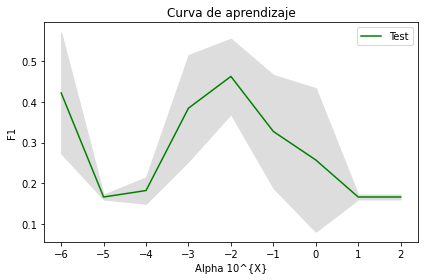

In [777]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Alpha 10^{X}"), plt.ylabel("F1"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Usamos un valor de alpha de 1.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(0, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam', alpha=1, 
             learning_rate='constant', learning_rate_init=regul_param, max_iter=100000, random_state=seed)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, X, y, cv=5, scoring='f1_macro')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

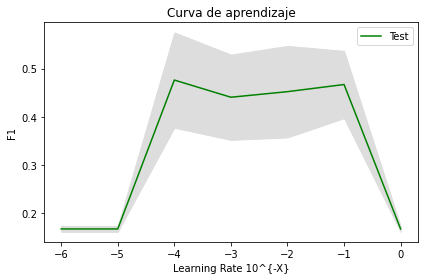

In [596]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Learning Rate 10^{-X}"), plt.ylabel("F1"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Usamos una tasa de aprendizaje inicial de 0.0001

## Modelo Final



In [11]:
# Modificar en función de los parámetros encontrados
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam', alpha=1, 
             learning_rate='constant', learning_rate_init=0.0001, max_iter=100000, random_state=77)

mlp.fit(X_train, y_train)



MLPClassifier(activation='logistic', alpha=1, hidden_layer_sizes=(10,),
              learning_rate_init=0.0001, max_iter=100000, random_state=77)

In [12]:
mlp.score(X_test,y_test)

0.6410256410256411

# Explicando la red neuronal 

### Explainer Dashboard

In [13]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

#removing ´.´ from column names
X_test.columns = X.columns.str.replace(r".", "")


The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


In [14]:
explainer = ClassifierExplainer(mlp, X_test, y_test)

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [31]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/39 [00:00<?, ?it/s]

Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating prediction probabilities...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating predictions...
Calculating roc auc curves...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating metrics...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.0.20:8050
Dash is running on http://0.0.0.0:8050/

 * Serving Flask app "explainerdashboard.dashboards" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
192.168.0.20 - - [19/Aug/2021 16:11:00] "GET / HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:00] "GET /assets/bootstrap.min.css?m=1620897295.7641573 HTTP/1.1" 304 -
192.168.0.20 - - [19/Aug/2021 16:11:00] "GET /_dash-dependencies HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:00] "GET /_dash-layout HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:00] "GET /assets/favicon.ico?m=1620897295.7797701 HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:01] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:01] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:01] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:01] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:01] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:01] "POST /_dash-update-component HTTP/1.1" 200

192.168.0.20 - - [19/Aug/2021 16:11:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:17] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:18] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.20 - - [19/Aug/2021 16:11:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.20 - - [19/Aug/2021 16:11:18] "POST /_dash-u

# A nivel de modelo

### Permutation Importance y SHAP Global

Abrir la primera pestaña del explainer Dashboard y seleccionar la clase que se quiere tomar como positiva en el menú desplegable. 

### ALE

In [251]:
from alibi.explainers.ale import ALE, plot_ale
proba_fun_lr = mlp.predict_proba
proba_ale_lr = ALE(proba_fun_lr, feature_names=train_cols, target_names=["Low","Medium","High"])
proba_exp_lr = proba_ale_lr.explain(X_train.to_numpy())

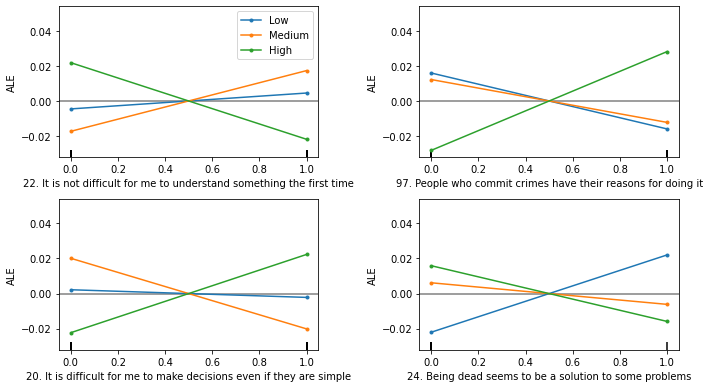

In [654]:
#Modificar el parámetro features para mostrar las preguntas deseadas, si se quiere mostrar el gráfico de 
#la pregunta x, se debe poner el indice que es x-1.

plot_ale(proba_exp_lr, n_cols=2, features=[21,96,19, 23],fig_kw={'figwidth': 10, 'figheight': 5.5});

## A nivel de instancia

## LIME 

In [657]:
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), categorical_features=train_cols,feature_names=train_cols, class_names=target_names, discretize_continuous=True)



### Individuo con Nivel Bajo de Depresion

In [658]:
exp0 = explainer.explain_instance(X_test.to_numpy()[0], mlp.predict_proba, num_features=8,top_labels=1) 
exp0.show_in_notebook(show_table=True, show_all=False)

### Individuo con Nivel Medio de Depresion

In [659]:
exp1 = explainer.explain_instance(X_test.to_numpy()[1], mlp.predict_proba, num_features=6,top_labels=1) 
exp1.show_in_notebook(show_table=True, show_all=False)

### Individuos con Nivel Alto de Depresion

In [660]:
exp2 = explainer.explain_instance(X_test.to_numpy()[-11], mlp.predict_proba, num_features=6,top_labels=1) 
exp2.show_in_notebook(show_table=True, show_all=False)

In [661]:
exp2 = explainer.explain_instance(X_test.to_numpy()[3], mlp.predict_proba, num_features=6,top_labels=1) 
exp2.show_in_notebook(show_table=True, show_all=False)

## SHAP Local

Para probar con distintos individuos basta cambiar la variable "individuo" correspondientemente. Se muestran los valores SHAP
únicamente para la clase a la que pertenece dicho individuo de acuerdo a la predicción del modelo.

In [656]:
import shap

### Individuo con Nivel Bajo de Depresion

  0%|          | 0/1 [00:00<?, ?it/s]

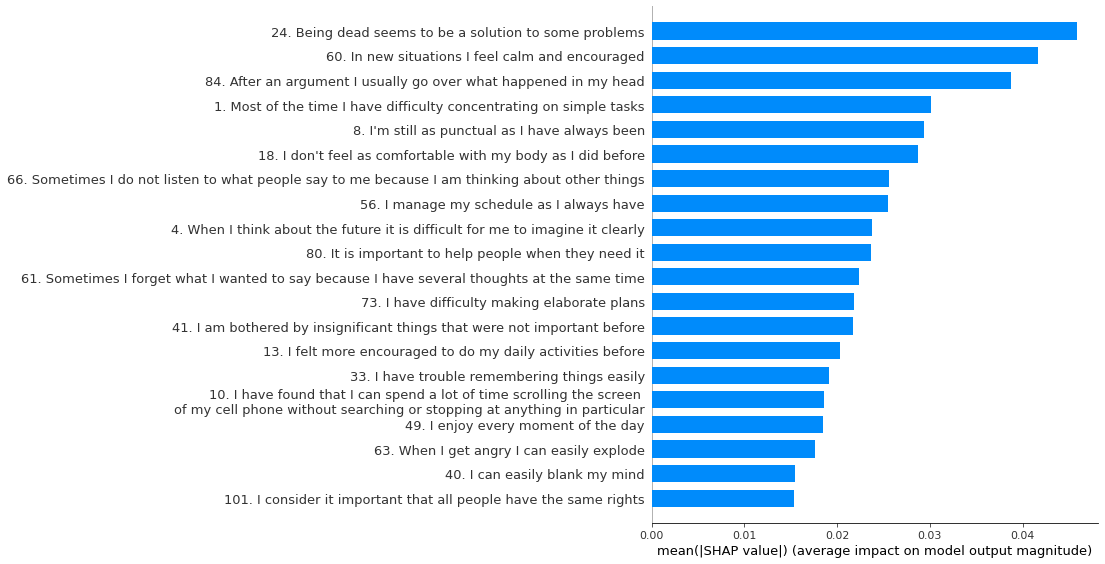

In [93]:
individuo = 


explainer = shap.KernelExplainer(mlp.predict_proba, X_train,feature_names=train_cols, output_names=["Bajo","Medio","Alto"])
shap_values = explainer.shap_values(individuo)
clase = mlp.predict(individuo)[0]
shap.summary_plot(shap_values[clase],individuo,feature_names=train_cols,plot_type="bar")

### Individuo con Nivel Medio de Depresion

  0%|          | 0/1 [00:00<?, ?it/s]

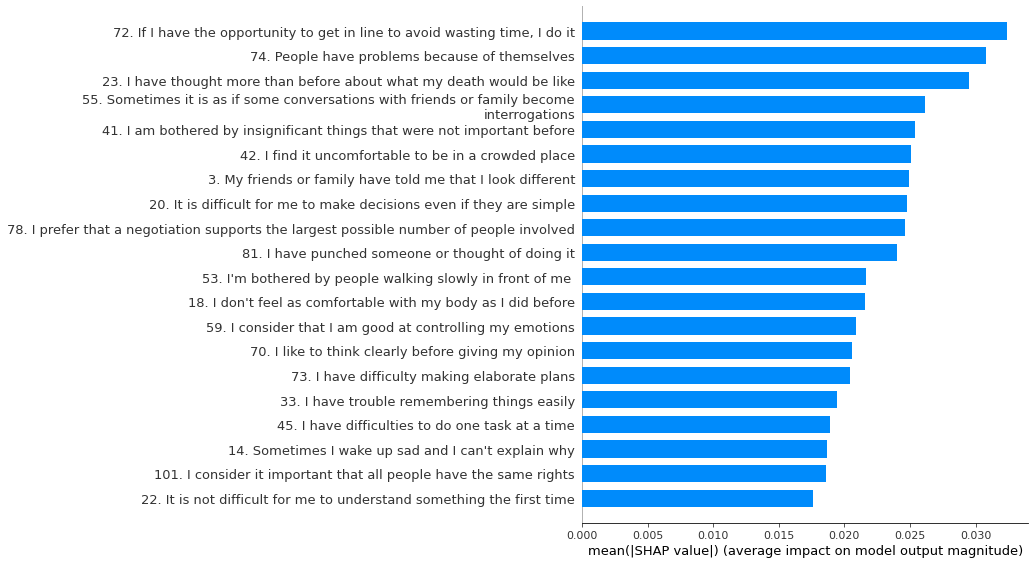

In [662]:
individuo = X_test.iloc[[1]]

explainer = shap.KernelExplainer(mlp.predict_proba, X_train,feature_names=train_cols, output_names=["Bajo","Medio","Alto"])
shap_values = explainer.shap_values(individuo)
clase = mlp.predict(individuo)[0]
shap.summary_plot(shap_values[clase],individuo,feature_names=train_cols,plot_type="bar")

### Individuos con Nivel Alto de Depresion

  0%|          | 0/1 [00:00<?, ?it/s]

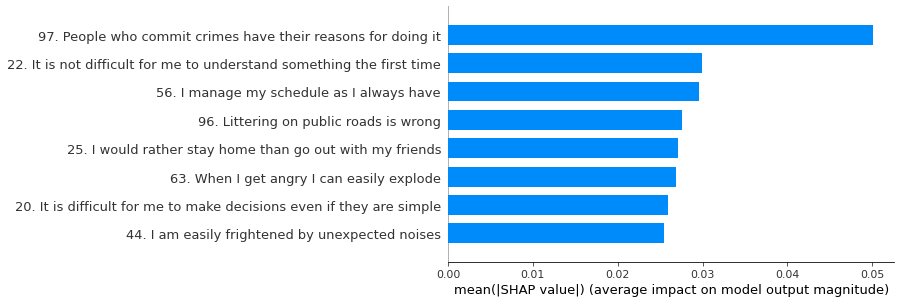

In [663]:
individuo = X_test.iloc[[-11]]

explainer = shap.KernelExplainer(mlp.predict_proba, X_train,feature_names=train_cols, output_names=["Bajo","Medio","Alto"])
shap_values = explainer.shap_values(individuo)
clase = mlp.predict(individuo)[0]
shap.summary_plot(shap_values[clase],individuo,feature_names=train_cols,plot_type="bar",max_display=8)

  0%|          | 0/1 [00:00<?, ?it/s]

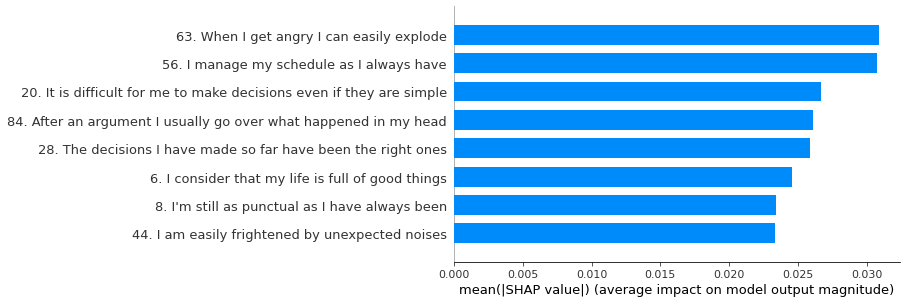

In [664]:
individuo = X_test.iloc[[3]]

explainer = shap.KernelExplainer(mlp.predict_proba, X_train,feature_names=train_cols, output_names=["Bajo","Medio","Alto"])
shap_values = explainer.shap_values(individuo)
clase = mlp.predict(individuo)[0]
shap.summary_plot(shap_values[clase],individuo,feature_names=train_cols,plot_type="bar",max_display=8)

### Anchors (No se incluyeron en el trabajo)

In [665]:
predict_fn = lambda x: mlp.predict_proba(x)

In [666]:
from alibi.explainers import AnchorTabular
explainer = AnchorTabular(predict_fn, train_cols)

In [667]:
explainer.fit(X_train.to_numpy(), disc_perc=(25, 50, 75))

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': None, 'disc_perc': (25, 50, 75)}}
)

### Para individuo clasificado con bajo nivel de Depresión

In [671]:
explanation = explainer.explain(X_test.to_numpy()[0], threshold=0.9, seed=42)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Anchor: 84. Después de una discusión suelo repasar en mi cabeza lo sucedido > 0.00 AND 60. Ante situaciones nuevas me siento tranquilo y animado <= 0.00 AND 41. Me molestan cosas insignificantes que antes no eran importantes > 0.00
Precision: 1.00
Coverage: 0.03


### Para individuo clasificado con nivel de depresión Medio

In [529]:
explanation = explainer.explain(X_test.to_numpy()[1], threshold=0.8, seed=42)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Anchor: 55. A veces es como si algunas pláticas con amigos o familiares se volvieran interrogatorios <= 0.00 AND 53. Me molesta la gente que camina lento por la calle frente a mí <= 0.00 AND 45. Tengo dificultades para hacer una tarea a la vez <= 0.00 AND 1. La mayor parte del tiempo tengo dificultad para concentrarme en tareas 
sencillas > 0.00
Precision: 1.00
Coverage: 0.01


### Para individuo clasificado con nivel de depresión Alto

In [530]:
explanation = explainer.explain(X_test.to_numpy()[3], threshold=0.8, seed=42)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Anchor: 8. Sigo siendo tan puntual como siempre he sido <= 0.00 AND 56. Manejo mis horarios como siempre lo he hecho <= 0.00 AND 63. Al enojarme puedo explotar con facilidad <= 0.00
Precision: 0.83
Coverage: 0.06


#### En las 3 anchors que se muestran vemos un valor de Coverage muy bajo, por lo que si bien la precision es alta, no necesariamente aplican las mismas reglas a instancias similares.

# Mapas de Calor

Para los mapas con valores medios y globales se muestran en rojo las preguntas que fueron identificadas como contradicttorias segun ALE. Esto no aplica a los explicadores locales como SHAP y LIME donde se muestran todas las instancias, pero si a mapas con los valores medios.

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
l_contr = [3,4,5,14,21,24,25,26,27,29,30,32,48,49,51,54,55,58,59,60,62,63,66,68,
    70,75,78,83,85,86,87,89,90,91,94,95,96,98,100,101]

## Variable Importance

Aumento del procentaje de error al variar las respuestas a las preguntas aleatoriamente. Los valores negativos se sustituyeron por 0 para un mejor entendimiento del mapa.

### Clase Depresión Baja

In [79]:
df_importance0

Importance
1      0.009740
2      0.003247
3      0.012987
4      0.000000
5      0.003247
..          ...
98     0.000000
99     0.006494
100    0.000000
101    0.019481
102    0.000000

[102 rows x 1 columns]

In [90]:
df_mask = [[False for x in range(1,103)]]
for ind in l_contr:
    df_mask[0][ind-1] = True
df_mask = pd.DataFrame(df_mask)
df_mask

0      1     2     3     4      5      6      7      8      9    ...  \
0  False  False  True  True  True  False  False  False  False  False  ...   

     92    93    94    95     96    97     98    99    100    101  
0  False  True  True  True  False  True  False  True  True  False  

[1 rows x 102 columns]

In [81]:
df_importance0.transpose()

1         2         3    4         5    6    7         8    \
Importance  0.00974  0.003247  0.012987  0.0  0.003247  0.0  0.0  0.016234   

            9         10   ...  93   94        95   96        97   98   \
Importance  0.0  0.032468  ...  0.0  0.0  0.003247  0.0  0.006494  0.0   

                 99   100       101  102  
Importance  0.006494  0.0  0.019481  0.0  

[1 rows x 102 columns]

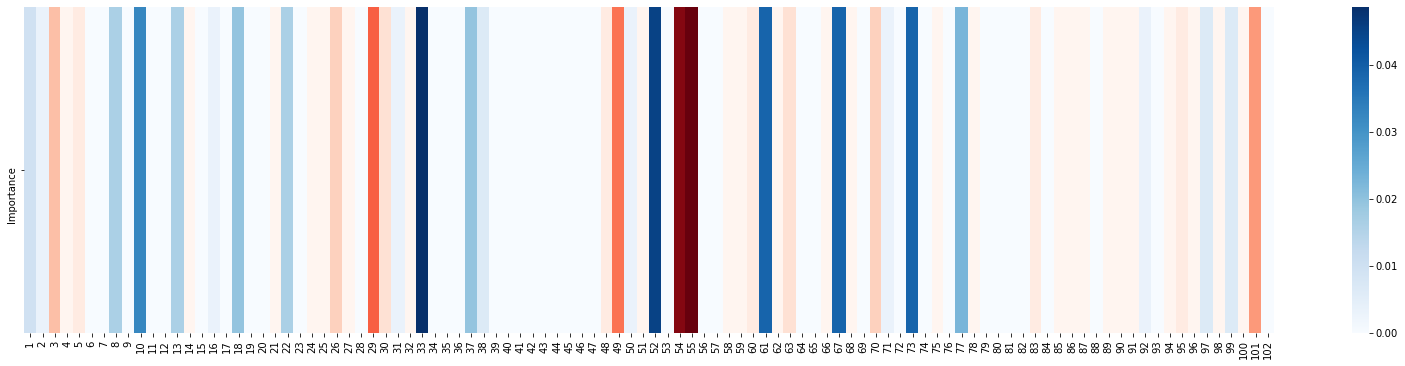

In [91]:
df_importance0 = explainer.permutation_importances(0).sort_index()
df_importance0.index = range(1,103)
df_importance0.drop("Score",inplace=True, axis=1)
df_importance0.drop("Feature",inplace=True, axis=1)
df_importance0.loc[df_importance0['Importance'] < 0, 'Importance'] = 0


plt.figure(figsize = (28,6))
sns.heatmap(df_importance0.transpose(), cmap="Reds", cbar=False)
sns.heatmap(df_importance0.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask.to_numpy())


### Clase Depresión Media

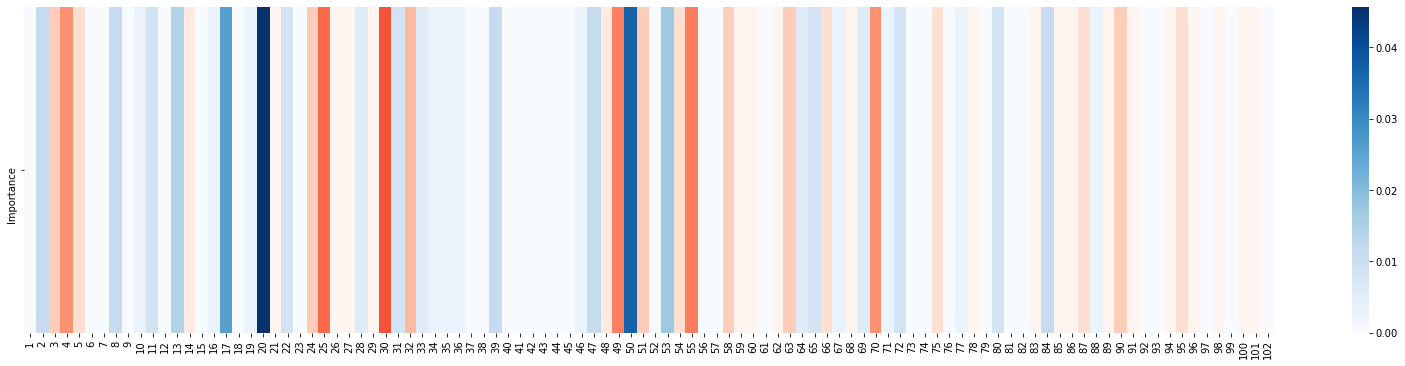

In [92]:
df_importance1 = explainer.permutation_importances(1).sort_index()
df_importance1.index = range(1,103)
df_importance1.drop("Score",inplace=True, axis=1)
df_importance1.drop("Feature",inplace=True, axis=1)
df_importance1.loc[df_importance1['Importance'] < 0, 'Importance'] = 0

plt.figure(figsize = (28,6))
sns.heatmap(df_importance1.transpose(), cmap="Reds", cbar=False)
sns.heatmap(df_importance1.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask.to_numpy())


### Clase Depresión Alta

In [93]:
df_importance2 = explainer.permutation_importances(2).sort_index()
df_importance2.index = range(1,103)
df_importance2.drop("Score",inplace=True, axis=1)
df_importance2.drop("Feature",inplace=True, axis=1)
df_importance2.loc[df_importance2['Importance'] < 0, 'Importance'] = 0

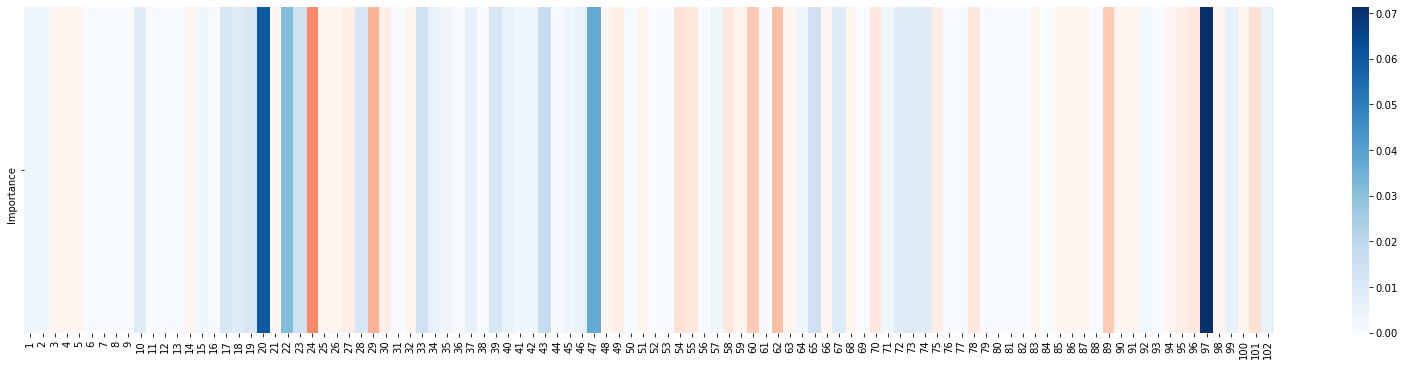

In [94]:
plt.figure(figsize = (28,6))
sns.heatmap(df_importance2.transpose(), cmap="Reds", cbar=False)
sns.heatmap(df_importance2.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask.to_numpy())


### Clases Juntas

In [102]:
df_importance = pd.concat([df_importance0,df_importance1,df_importance2], axis=1)
df_importance.columns = ["Class 0","Class 1","Class 2"]


df_mask_imp= pd.concat([df_mask, df_mask, df_mask], ignore_index = True, axis = 0)
df_mask_imp

0      1     2     3     4      5      6      7      8      9    ...  \
0  False  False  True  True  True  False  False  False  False  False  ...   
1  False  False  True  True  True  False  False  False  False  False  ...   
2  False  False  True  True  True  False  False  False  False  False  ...   

     92    93    94    95     96    97     98    99    100    101  
0  False  True  True  True  False  True  False  True  True  False  
1  False  True  True  True  False  True  False  True  True  False  
2  False  True  True  True  False  True  False  True  True  False  

[3 rows x 102 columns]

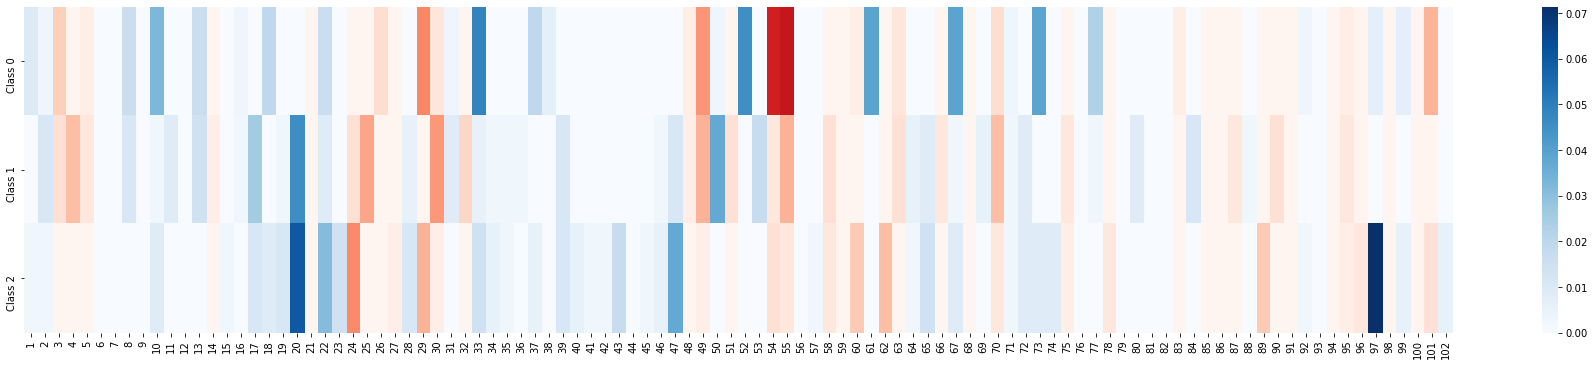

In [104]:
plt.figure(figsize = (32,6))
sns.heatmap(df_importance.transpose(), cmap="Reds", cbar=False)
sns.heatmap(df_importance.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask_imp.to_numpy())

## SHAP

Contribución a la probabilidad la clase en cuestión segun los valores SHAP. Para cada clase se muestra primero un
mapa con todos los individuos y la contribución de cada pregunta, y luego un mapa hecho con la media de estos valores en valor absoluto (SHAP global)

### Clase Depresión Baja

In [27]:
dfshap0=explainer.get_shap_values_df(0)
dfshap0.columns = [i+1 for i in range(102)]

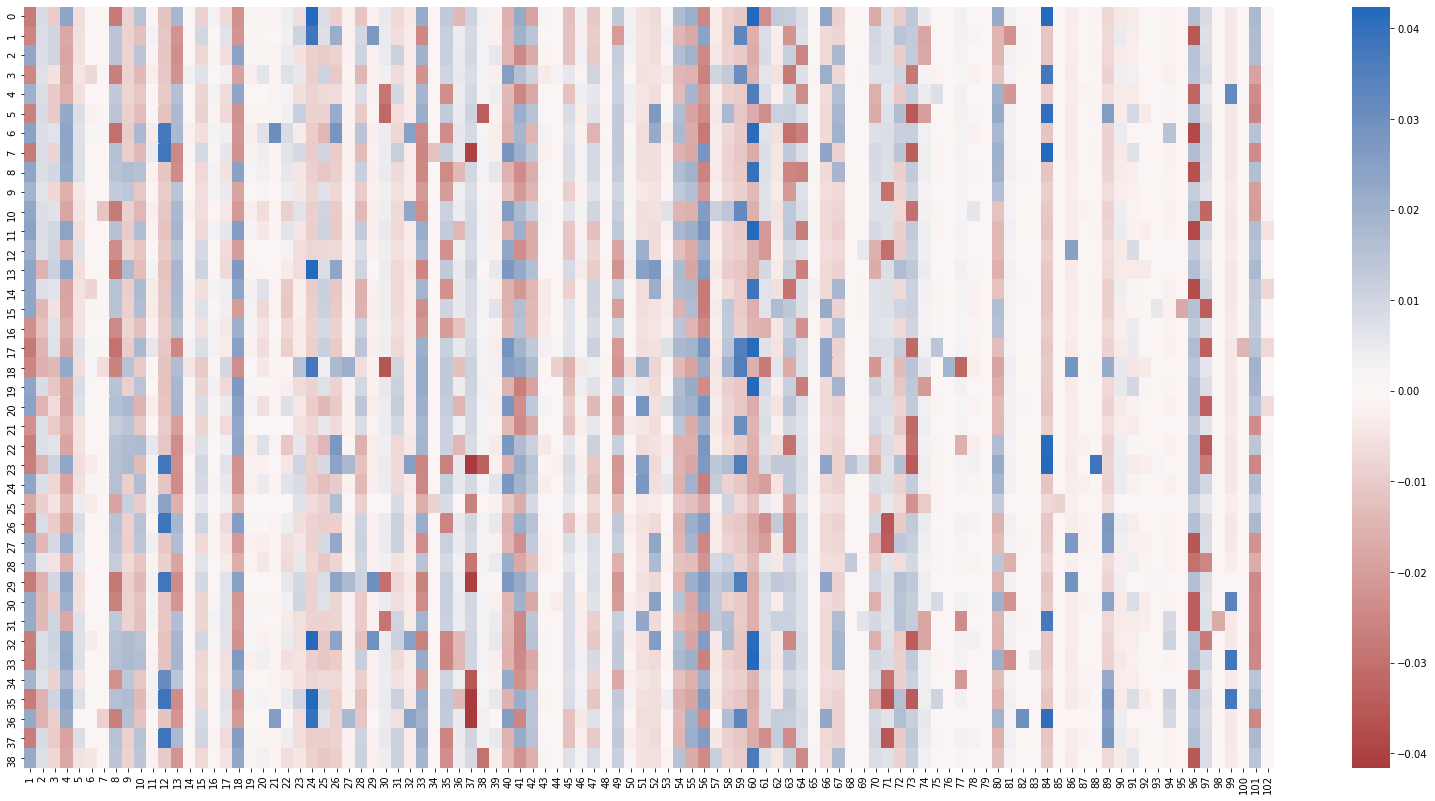

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (28,14))
sns.heatmap(dfshap0, cmap="vlag_r",yticklabels=True, xticklabels=True,center=0)

In [29]:
dfshap0mean = dfshap0.abs().mean(axis=0).to_frame()
dfshap0mean.columns= ["Mean SHAP"]


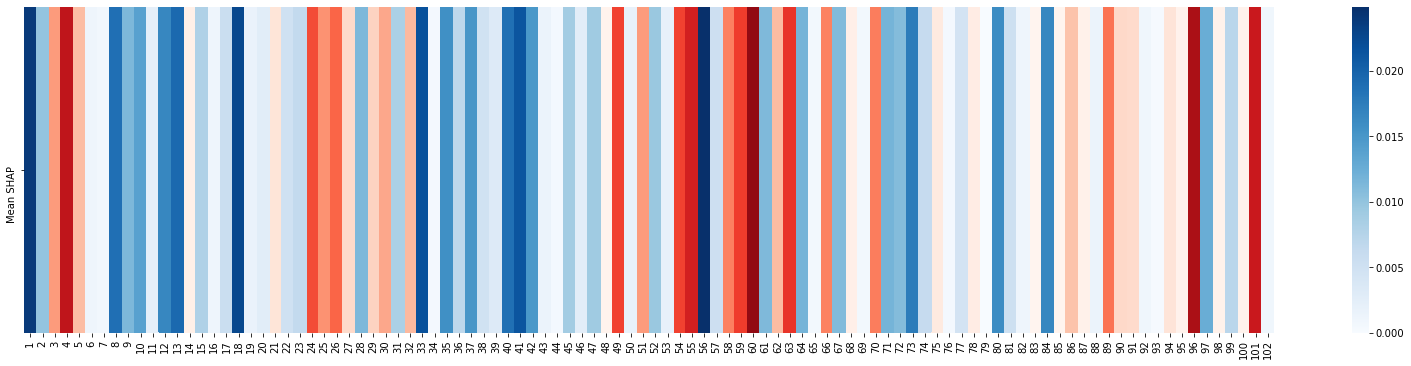

In [105]:
plt.figure(figsize = (28,6))
sns.heatmap(dfshap0mean.transpose(), cmap="Reds", cbar=False)
sns.heatmap(dfshap0mean.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask.to_numpy())

### Clase Depresion Media

In [31]:
dfshap1=explainer.get_shap_values_df(1)
dfshap1.columns = [i+1 for i in range(102)]

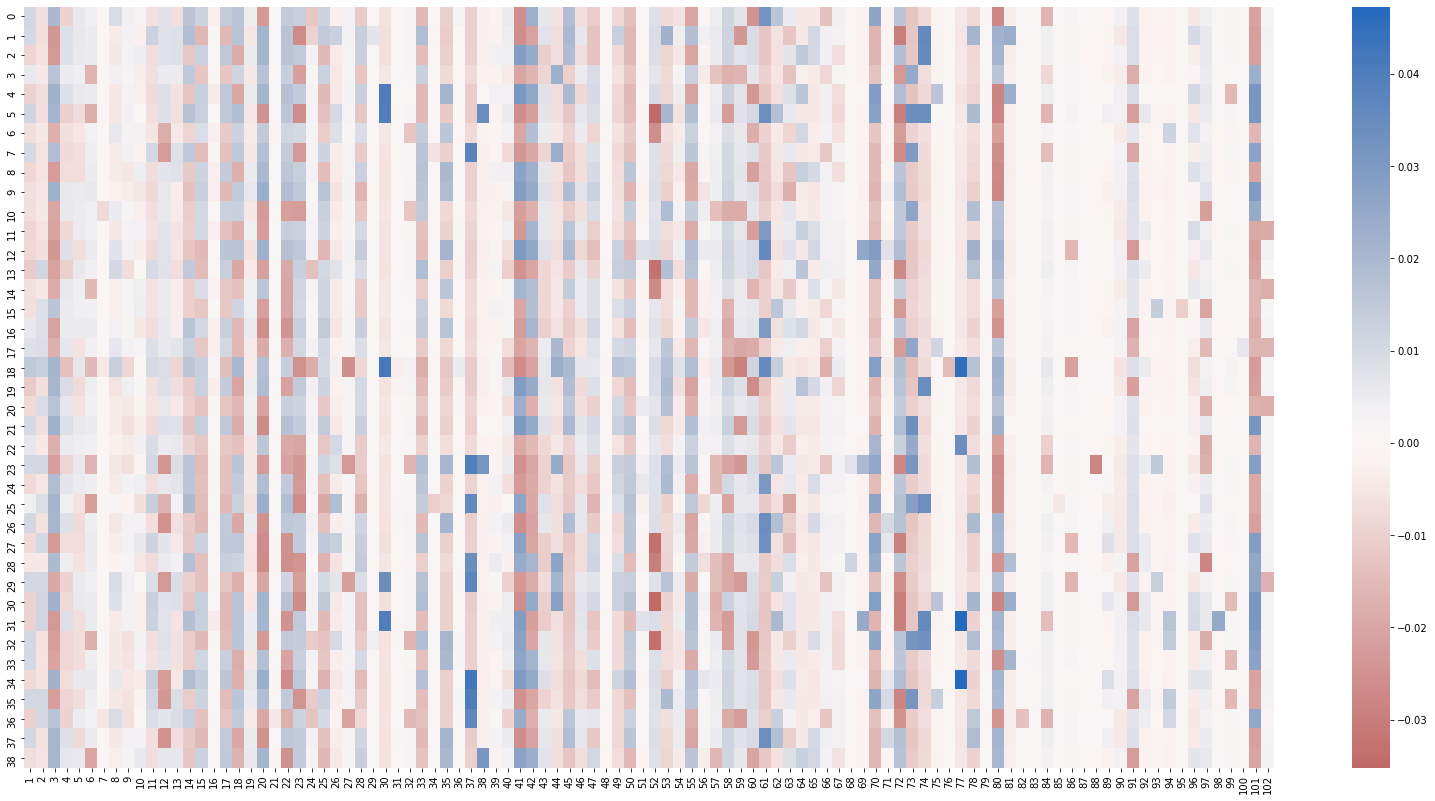

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (28,14))
sns.heatmap(dfshap1, cmap="vlag_r",yticklabels=True, xticklabels=True, center=0)


In [33]:
dfshap1mean = dfshap1.abs().mean(axis=0).to_frame()
dfshap1mean.columns= ["Mean SHAP"]

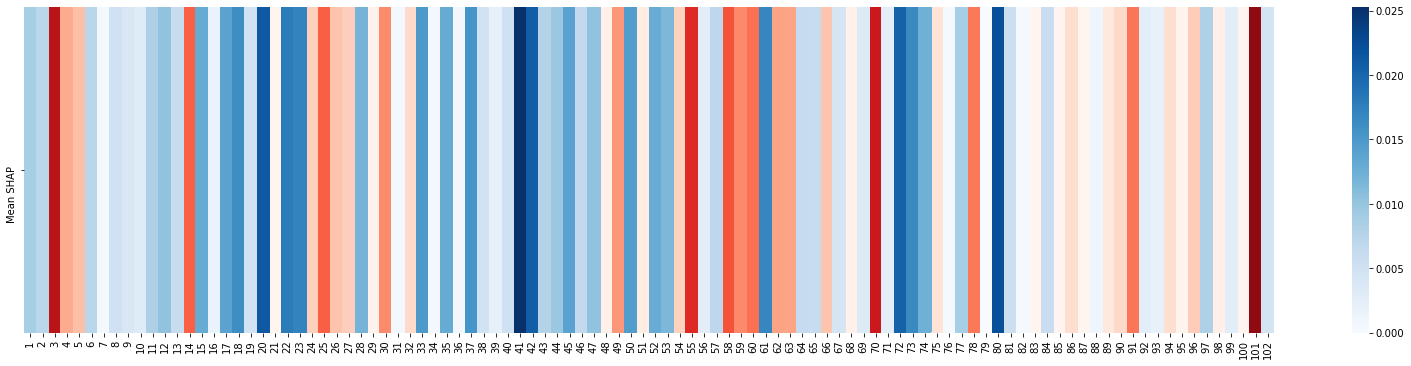

In [106]:
plt.figure(figsize = (28,6))
sns.heatmap(dfshap1mean.transpose(), cmap="Reds", cbar=False)
sns.heatmap(dfshap1mean.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask.to_numpy())

### Clase Depresion Alta

In [21]:
dfshap2=explainer.get_shap_values_df(2)
dfshap2.columns = [i+1 for i in range(102)]

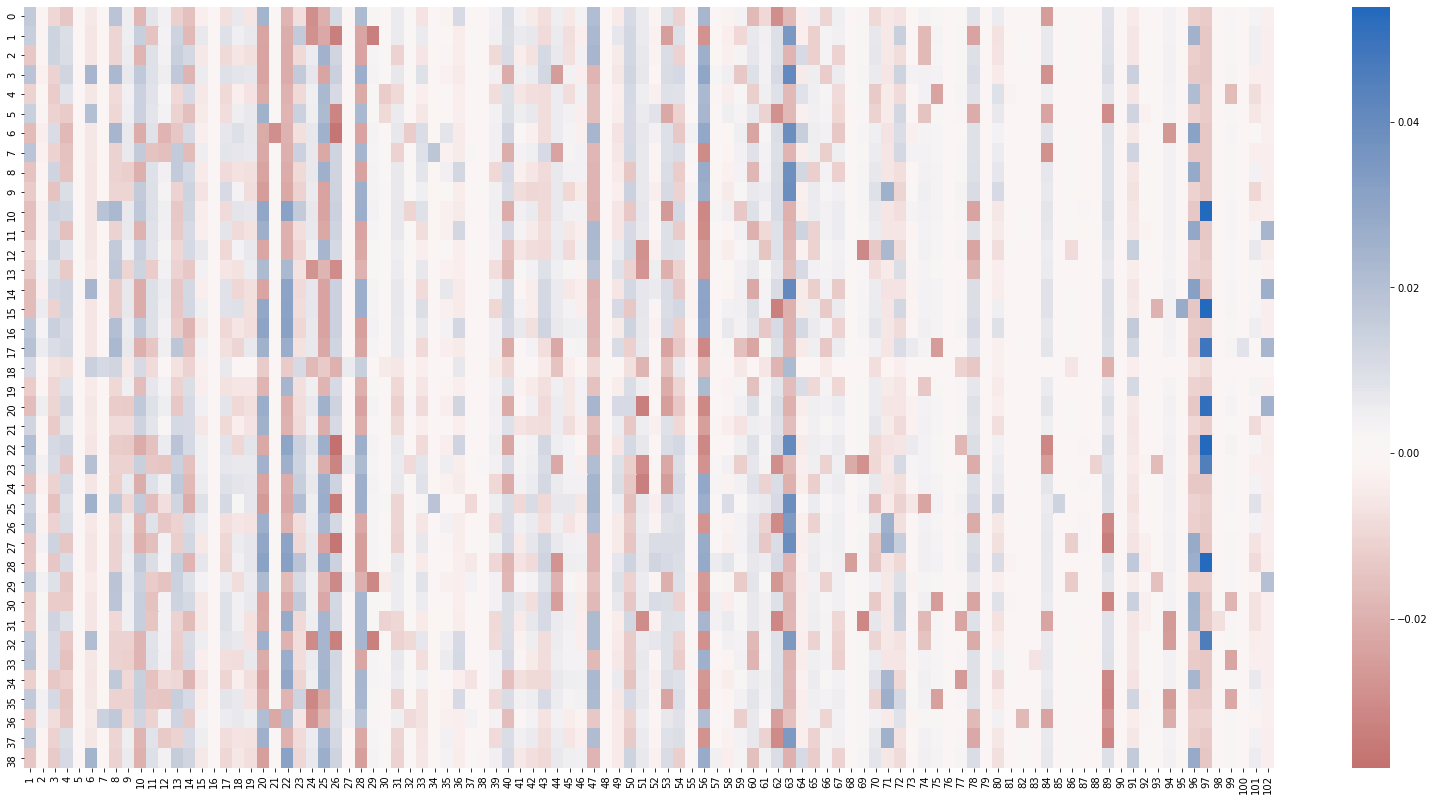

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (28,14))

sns.heatmap(dfshap2, cmap="vlag_r",yticklabels=True, xticklabels=True, center= 0)

In [23]:
dfshap2mean = dfshap2.abs().mean(axis=0).to_frame()
dfshap2mean.columns= ["Mean SHAP"]

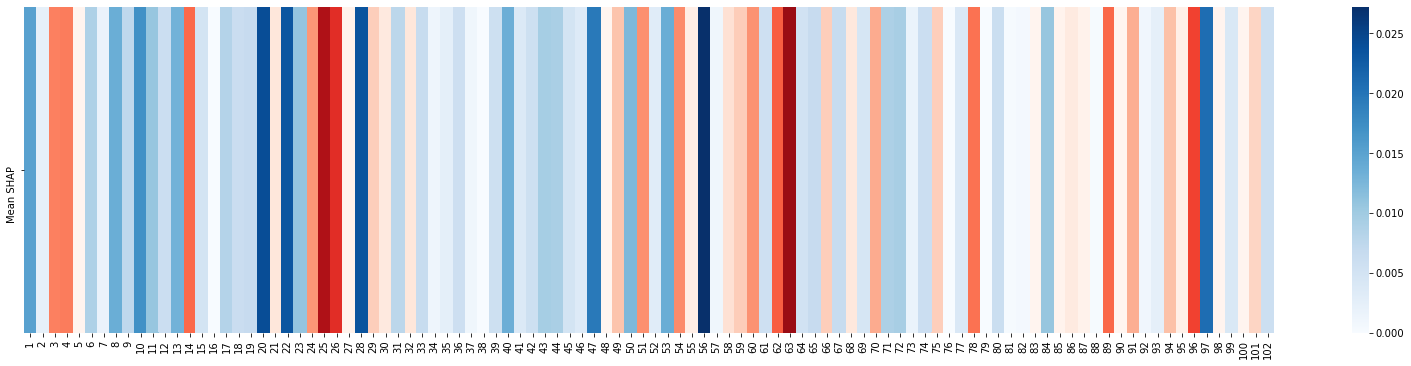

In [107]:
plt.figure(figsize = (28,6))
sns.heatmap(dfshap2mean.transpose(), cmap="Reds", cbar=False)
sns.heatmap(dfshap2mean.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask.to_numpy())

### Todas las clases

In [109]:
df_shap = pd.concat([dfshap0mean,dfshap1mean,dfshap2mean], axis=1)
df_shap.columns = ["Class 0","Class 1","Class 2"]

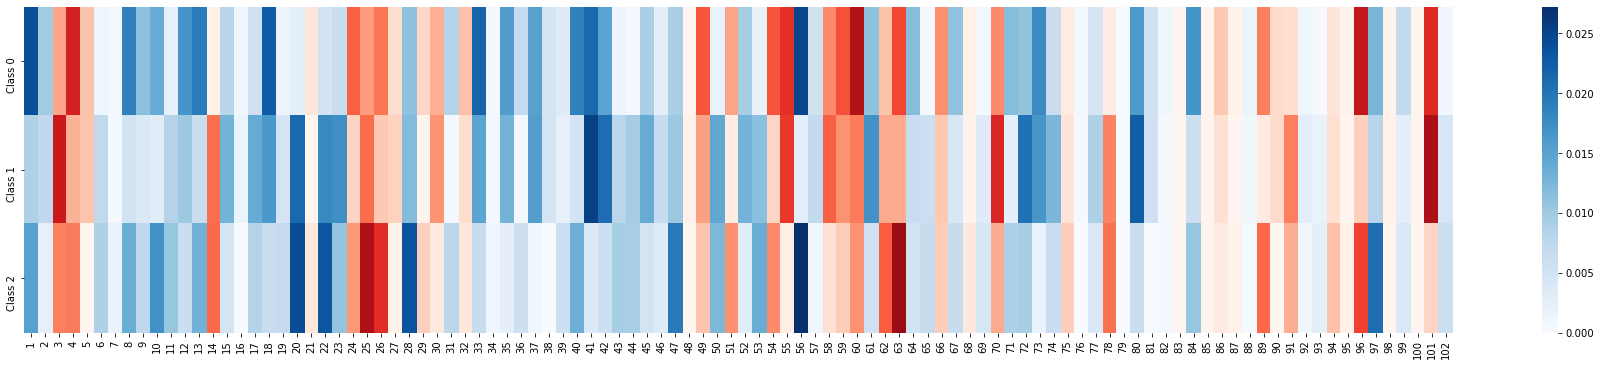

In [110]:
plt.figure(figsize = (32,6))
sns.heatmap(df_shap.transpose(), cmap="Reds", cbar=False)
sns.heatmap(df_shap.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask_imp.to_numpy())

### LIME

Contribución en la probabilidad final de cada pregunta para instancias específicas a nivel local. Para cada clase se muestra primero un mapa con todos los individuos y la contribución de cada pregunta, y luego un mapa hecho con la media de estos valores en valor absoluto. Con esto se busca globalizar el alcance de LIME.

In [135]:
import pandas as pd
from operator import itemgetter
import lime.lime_tabular

limexp = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), categorical_features=train_cols,feature_names=train_cols, class_names=target_names, discretize_continuous=True)




In [161]:
exp0_matrix = []
exp1_matrix = []
exp2_matrix = []
for x in X_test.to_numpy():  
    exp = limexp.explain_instance(x, mlp.predict_proba, num_features=102,top_labels=3) 
    exp0_map = exp.as_map()[0]
    exp0_map.sort(key=itemgetter(0))
    exp1_map = exp.as_map()[1]
    exp1_map.sort(key=itemgetter(0))
    exp2_map = exp.as_map()[2]
    exp2_map.sort(key=itemgetter(0))
    exp0_list = []
    exp1_list = []
    exp2_list = []
    for tup in exp0_map:
        exp0_list.append(tup[1])
    exp0_matrix.append(exp0_list)
    for tup in exp1_map:
        exp1_list.append(tup[1])
    exp1_matrix.append(exp1_list)
    for tup in exp2_map:
        exp2_list.append(tup[1])
    exp2_matrix.append(exp2_list)
    

### LIME Clase Baja Depresión

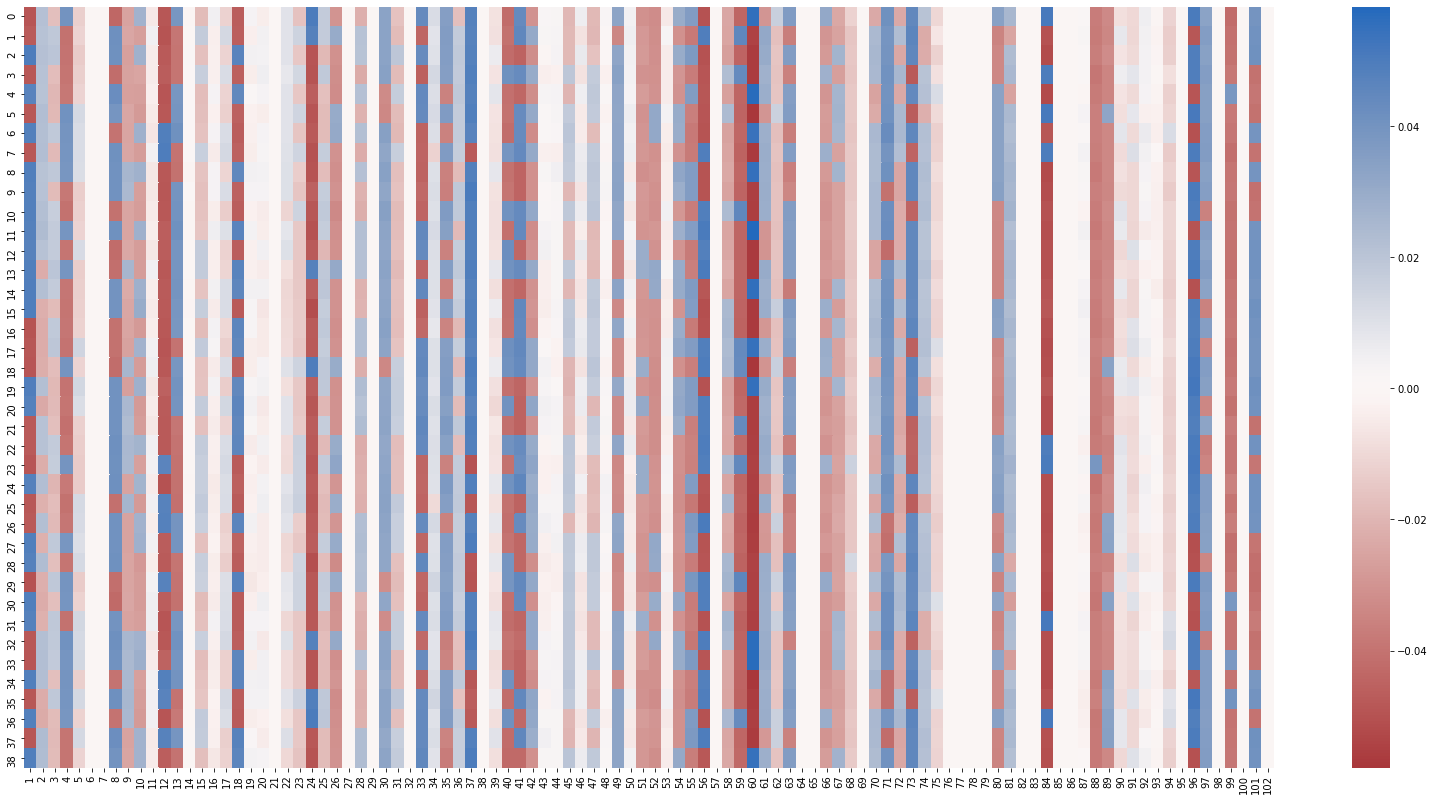

In [162]:
plt.figure(figsize = (28,14))
limedf0 = pd.DataFrame(exp0_matrix)
limedf0.columns = [i+1 for i in range(102)]
sns.heatmap(limedf0, cmap="vlag_r",yticklabels=True, xticklabels=True)

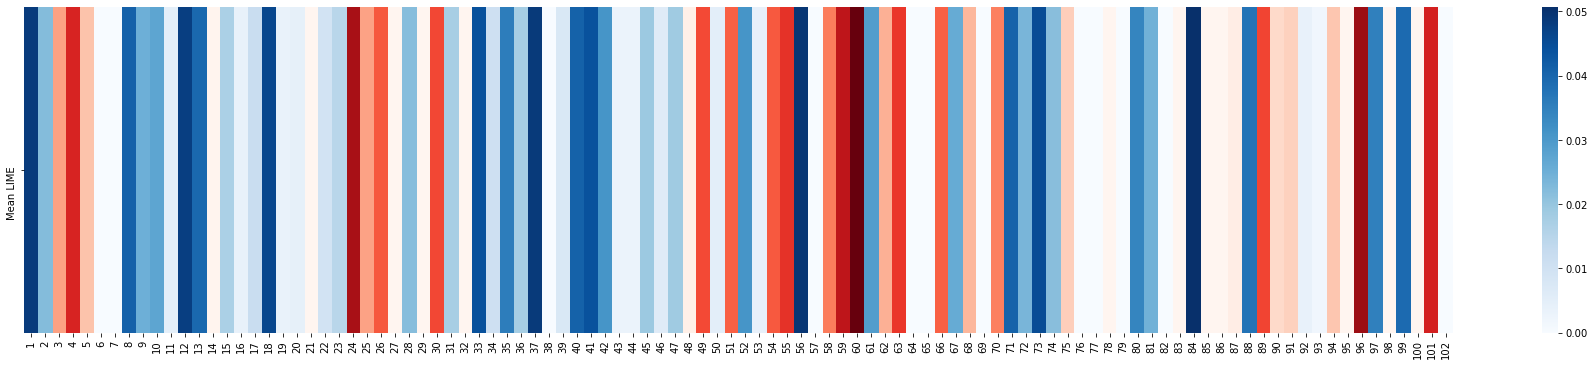

In [163]:
limedf0 = limedf0.abs().mean(axis=0).to_frame()
limedf0.columns= ["Mean LIME"]
plt.figure(figsize = (32,6))
sns.heatmap(limedf0.transpose(), cmap="Reds", cbar=False)
sns.heatmap(limedf0.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask.to_numpy())

### LIME Clase Media Depresión

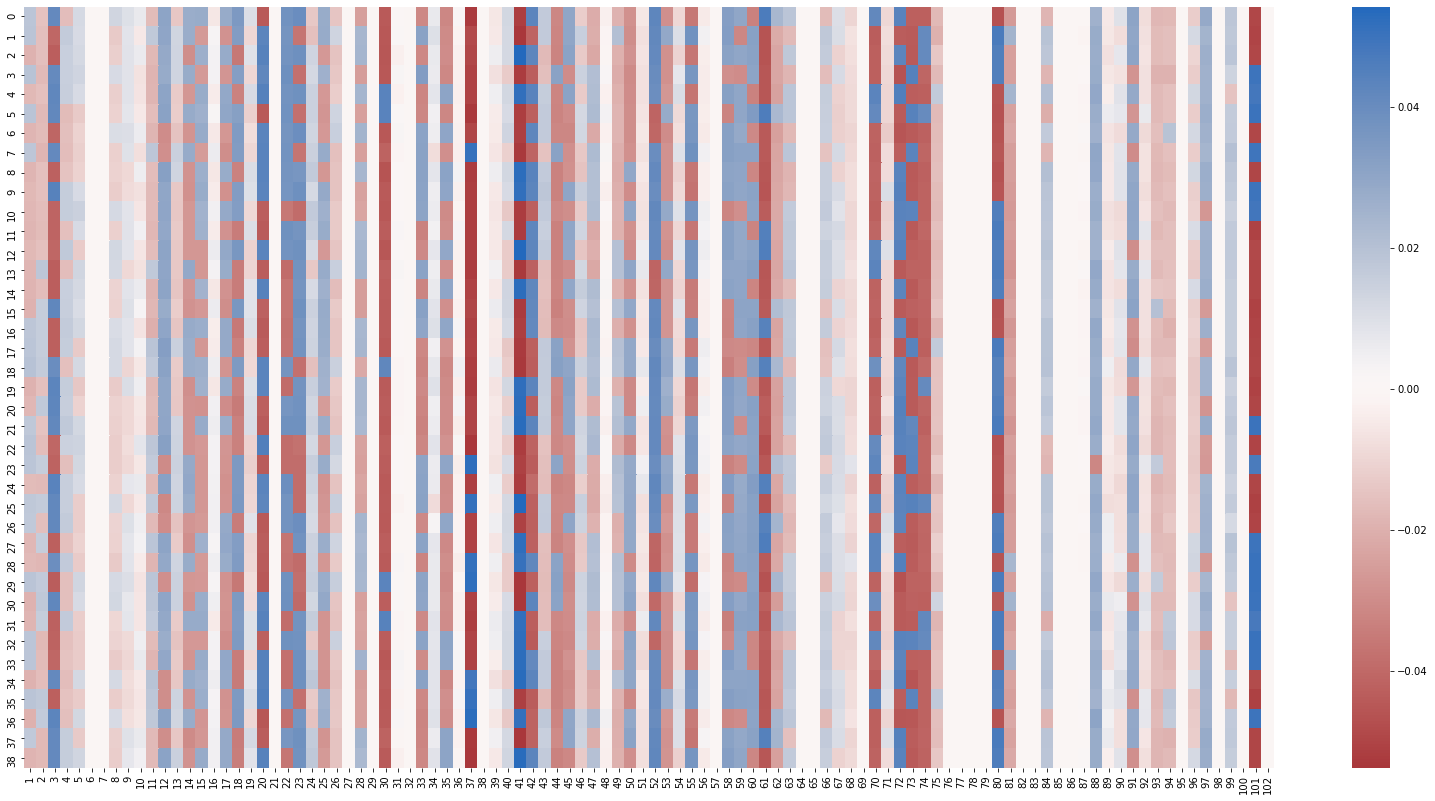

In [164]:
plt.figure(figsize = (28,14))
limedf1 = pd.DataFrame(exp1_matrix)
limedf1.columns = [i+1 for i in range(102)]
sns.heatmap(limedf1, cmap="vlag_r",yticklabels=True, xticklabels=True)

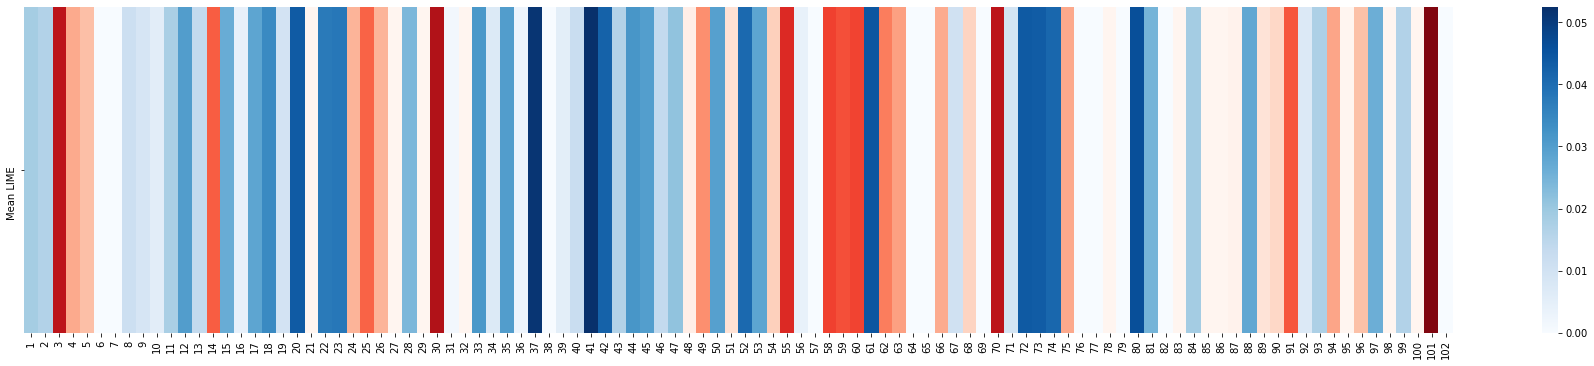

In [165]:
limedf1 = limedf1.abs().mean(axis=0).to_frame()
limedf1.columns= ["Mean LIME"]

plt.figure(figsize = (32,6))
sns.heatmap(limedf1.transpose(), cmap="Reds", cbar=False)
sns.heatmap(limedf1.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask.to_numpy())

### LIME Clase Alta Depresión

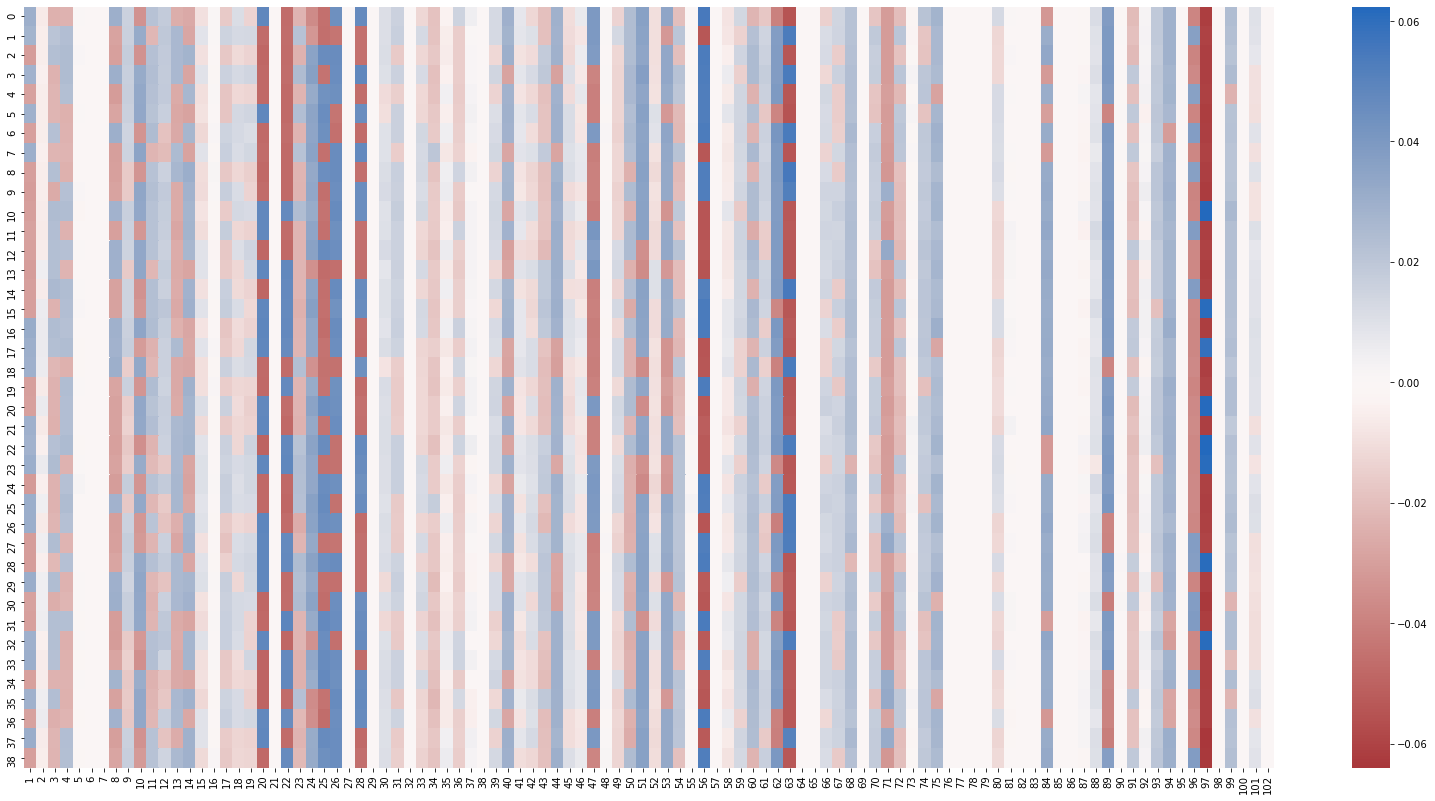

In [166]:
plt.figure(figsize = (28,14))
limedf2 = pd.DataFrame(exp2_matrix)
limedf2.columns = [i+1 for i in range(102)]
sns.heatmap(limedf2, cmap="vlag_r",yticklabels=True, xticklabels=True)

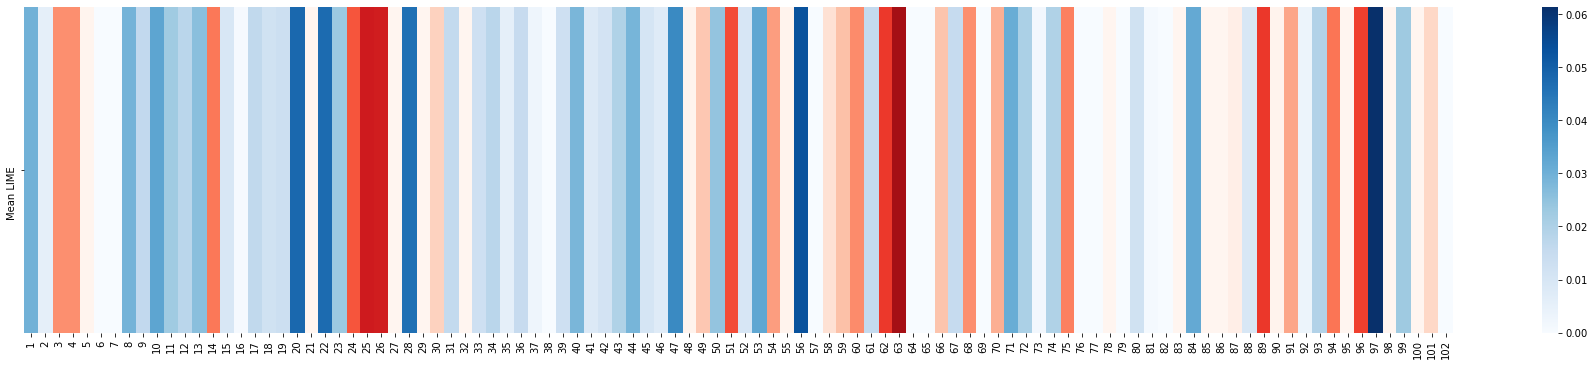

In [167]:
limedf2 = limedf2.abs().mean(axis=0).to_frame()
limedf2.columns= ["Mean LIME"]

plt.figure(figsize = (32,6))
sns.heatmap(limedf2.transpose(), cmap="Reds", cbar=False)
sns.heatmap(limedf2.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask.to_numpy())

### Todas las Clases

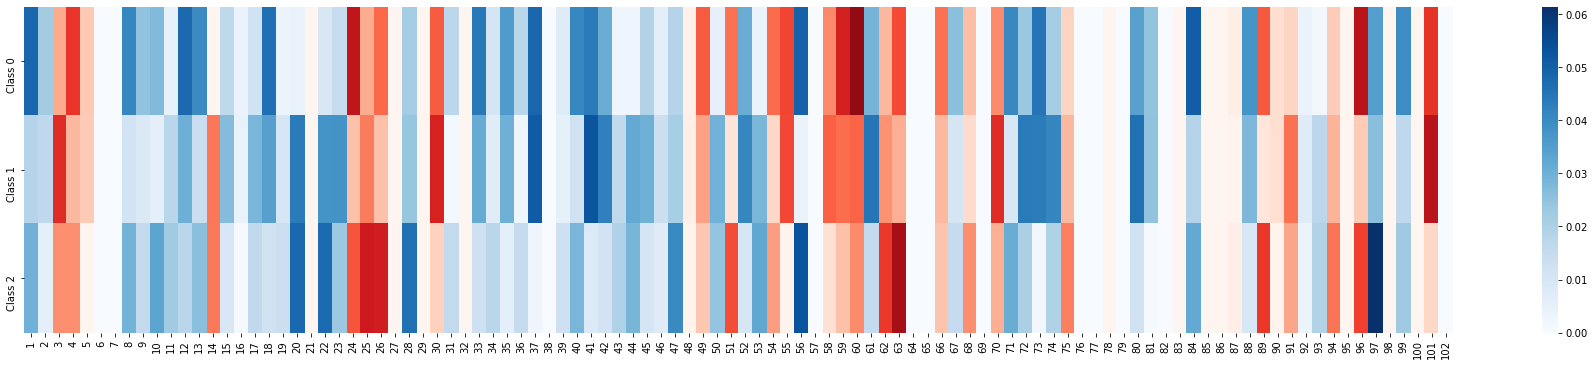

In [168]:
df_lime = pd.concat([limedf0,limedf1,limedf2], axis=1)
df_lime.columns = ["Class 0","Class 1","Class 2"]
plt.figure(figsize = (32,6))
sns.heatmap(df_lime.transpose(), cmap="Reds", cbar=False)
sns.heatmap(df_lime.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask_imp.to_numpy())

### ALE

Muestra el efecto principal de cada pregunta en comparación con la probablidad que predice el modelo para esa clase. Se muestra este efecto para ambas respuestas. Como son solo 2 respuestas, el mapa es el mismo pero con los colores invertidos. 

In [114]:
from alibi.explainers.ale import ALE, plot_ale
proba_fun_lr = mlp.predict_proba
proba_ale_lr = ALE(proba_fun_lr, feature_names=train_cols, target_names=["Low","Medium","High"])
proba_exp_lr = proba_ale_lr.explain(X_train.to_numpy())

In [115]:
proba_exp_lr.ale_values

[array([[ 0.02176561, -0.00826104, -0.01350457],
        [-0.02176561,  0.00826104,  0.01350457]]),
 array([[ 0.00993319, -0.00755074, -0.00238245],
        [-0.00993319,  0.00755074,  0.00238245]]),
 array([[ 0.00824165, -0.01902744,  0.01078579],
        [-0.00824165,  0.01902744, -0.01078579]]),
 array([[-0.01793978,  0.00723415,  0.01070563],
        [ 0.01793978, -0.00723415, -0.01070563]]),
 array([[-5.77319041e-03,  5.68808545e-03,  8.51049607e-05],
        [ 5.77319041e-03, -5.68808545e-03, -8.51049607e-05]]),
 array([[-0.00220098, -0.01031503,  0.01251601],
        [ 0.00220098,  0.01031503, -0.01251601]]),
 array([[-0.00455229, -0.00387753,  0.00842982],
        [ 0.00455229,  0.00387753, -0.00842982]]),
 array([[-0.01862275,  0.00524325,  0.0133795 ],
        [ 0.01862275, -0.00524325, -0.0133795 ]]),
 array([[-0.01129881,  0.00398827,  0.00731054],
        [ 0.01129881, -0.00398827, -0.00731054]]),
 array([[ 0.01242274,  0.00298471, -0.01540744],
        [-0.01242274, -0.00

In [119]:
ale0_list = []
ale1_list = []
ale2_list = []
for array in proba_exp_lr.ale_values:
    ale0_list.append(array[0][0])
    ale1_list.append(array[0][1])
    ale2_list.append(array[0][2])
    




In [120]:
ale0_df = pd.DataFrame([ale0_list])
ale0_df = pd.concat([ale0_df.multiply(-1),ale0_df])
ale0_df.index = ["Class 0 - False", "Class 0 - True"]
ale0_df.columns = range(1,103)

ale1_df = pd.DataFrame([ale1_list])
ale1_df = pd.concat([ale1_df.multiply(-1),ale1_df])
ale1_df.index = ["Class 1 - False", "Class 1 - True"]
ale1_df.columns = range(1,103)

ale2_df = pd.DataFrame([ale2_list])
ale2_df = pd.concat([ale2_df.multiply(-1),ale2_df])
ale2_df.index = ["Class 2 - False", "Class 2 - True"]
ale2_df.columns = range(1,103)

### ALE Depresión Baja

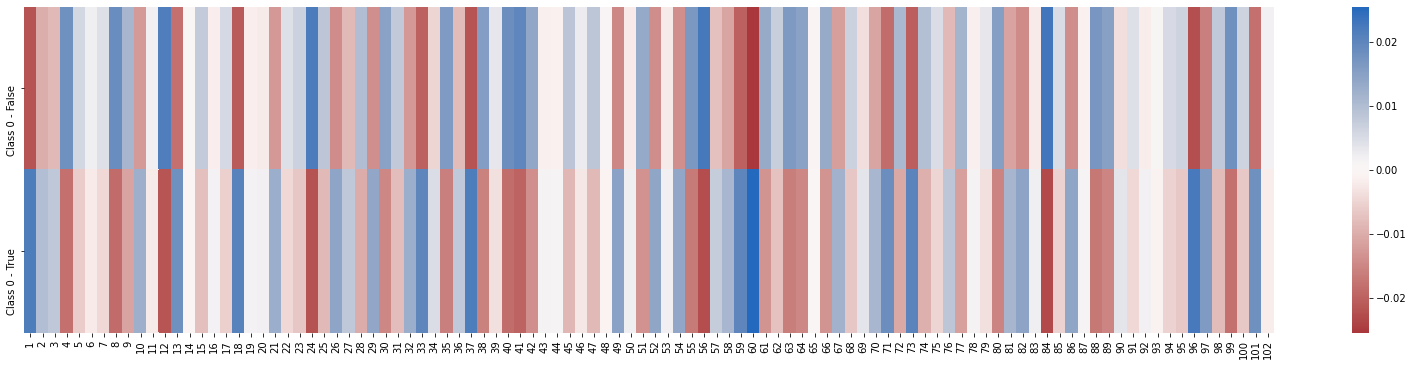

In [121]:
plt.figure(figsize = (28,6))
sns.heatmap(ale0_df, cmap="vlag_r",yticklabels=True, xticklabels=True)

### ALE Depresión Media

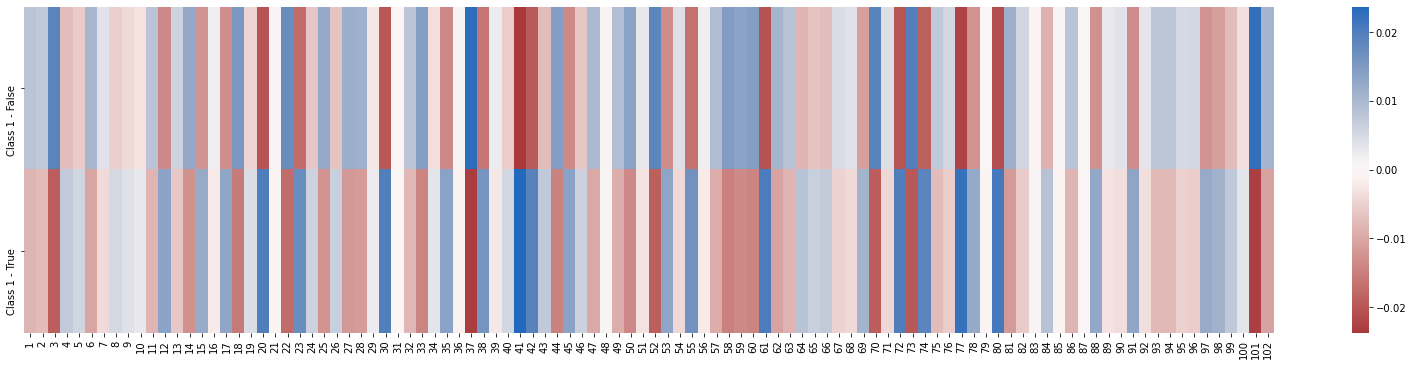

In [122]:
plt.figure(figsize = (28,6))
sns.heatmap(ale1_df, cmap="vlag_r",yticklabels=True, xticklabels=True)

### ALE Depresión Alta

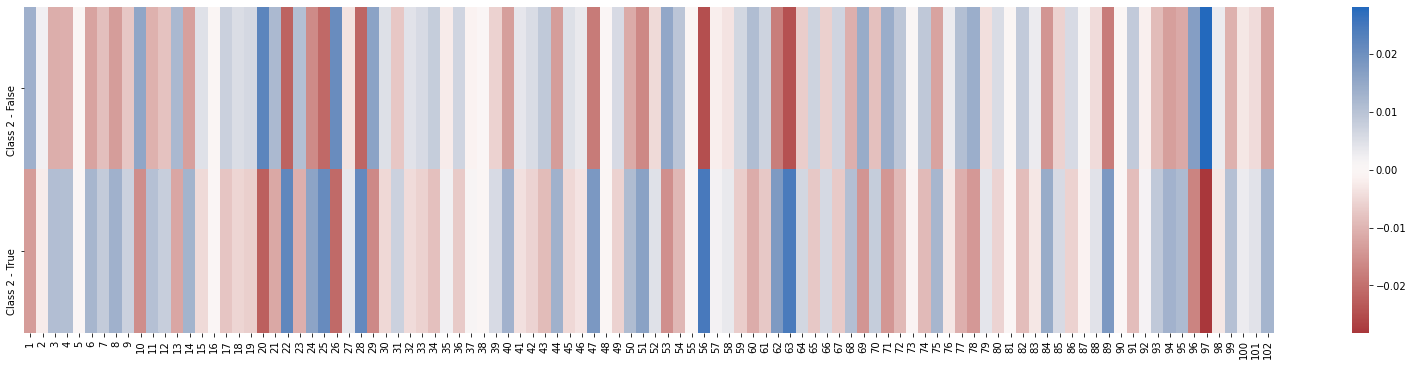

In [123]:
plt.figure(figsize = (28,6))
sns.heatmap(ale2_df, cmap="vlag_r",yticklabels=True, xticklabels=True)

### Todas las Clases (en valor absoluto)

In [133]:
ale0_df = ale0_df[0:1].abs()
ale1_df = ale1_df[0:1].abs()
ale2_df = ale2_df[0:1].abs()

ale_df = pd.concat([ale0_df,ale1_df,ale2_df])
ale_df.index = ["Class 0","Class 1","Class 2"]
ale_df = ale_df.transpose()

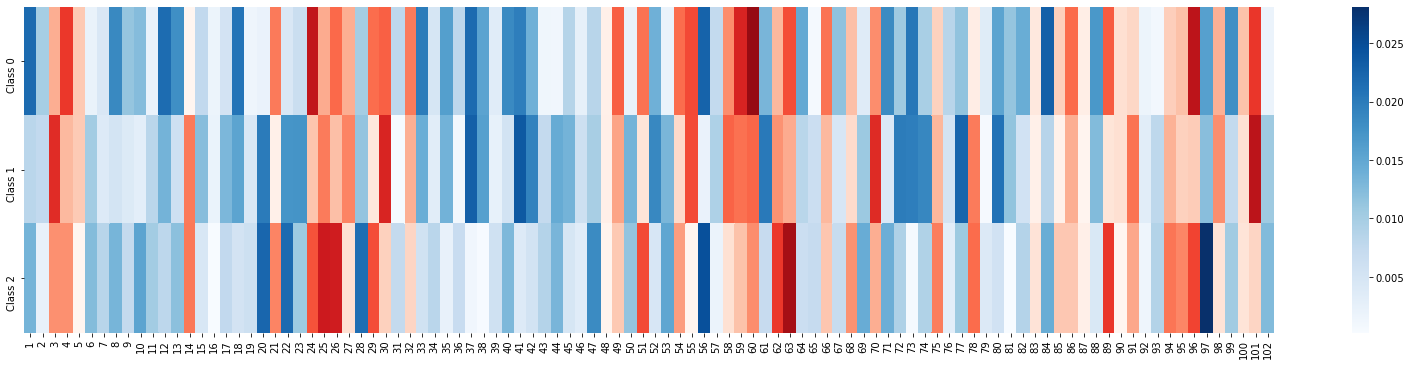

In [134]:
plt.figure(figsize = (28,6))
sns.heatmap(ale_df.transpose(), cmap="Reds", cbar=False)
sns.heatmap(ale_df.transpose(), cmap="Blues",yticklabels=True, xticklabels=True,mask=df_mask_imp.to_numpy())


## Comparando varios métodos

Se toman los valores globales de cada uno de los métodos utilizados, se obtienen sus máximos (los mímimos son 0) y se calcula un porcentaje en función de dicho máximo que indica que tan relevante es la contribución para cada pregunta. 

### Clase Baja Depresión

In [170]:
max_importance0 = df_importance["Class 0"].max()
max_shap0 = df_shap["Class 0"].max()
max_lime0 = df_lime["Class 0"].max()
max_ale0  = ale_df["Class 0"].max()


In [171]:
df_general0 = pd.DataFrame([  df_importance["Class 0"].multiply(100/max_importance0), 
                            df_lime["Class 0"].multiply(100/max_lime0),  
                            df_shap["Class 0"].multiply(100/max_shap0),
                              
                              ale_df["Class 0"].multiply(100/max_ale0)
                           ])

df_general0.index = ["Importance", "LIME", "SHAP", "ALE"]
df_general0

1          2          3          4          5         6    \
Importance  17.647059   5.882353  23.529412   0.000000   5.882353  0.000000   
LIME        86.673987  39.664535  32.838486  70.764239  22.367441  0.000000   
SHAP        96.089524  40.119888  34.966327  78.855118  24.386326  4.855592   
ALE         85.462751  39.002701  32.360871  70.440617  22.668454  8.642175   

                  7          8          9          10   ...       93   \
Importance   0.000000  29.411765   0.000000  58.823529  ...  0.000000   
LIME         0.000000  73.370777  44.837373  49.071123  ...  3.530573   
SHAP         3.462745  75.473328  45.613443  55.672455  ...  1.311581   
ALE         17.874580  73.122299  44.364814  48.777919  ...  4.182946   

                  94         95         96         97         98         99   \
Importance   0.000000   5.882353   0.000000  11.764706   0.000000  11.764706   
LIME        21.109692   0.000000  89.310698  62.858049   0.000000  70.417448   
SHAP        10.418612   1.841189  85.519663  50.595818   2.031685  28.605649   
ALE         20.667385  25.683125  88.110950  62.575925  31.404278  70.372431   

                  100        101       102  
Importance   0.000000  35.294118  0.000000  
LIME         0.000000  71.935632  0.000000  
SHAP         1.578390  75.408764  4.018865  
ALE         25.132478  70.961789  7.647776  

[4 rows x 102 columns]

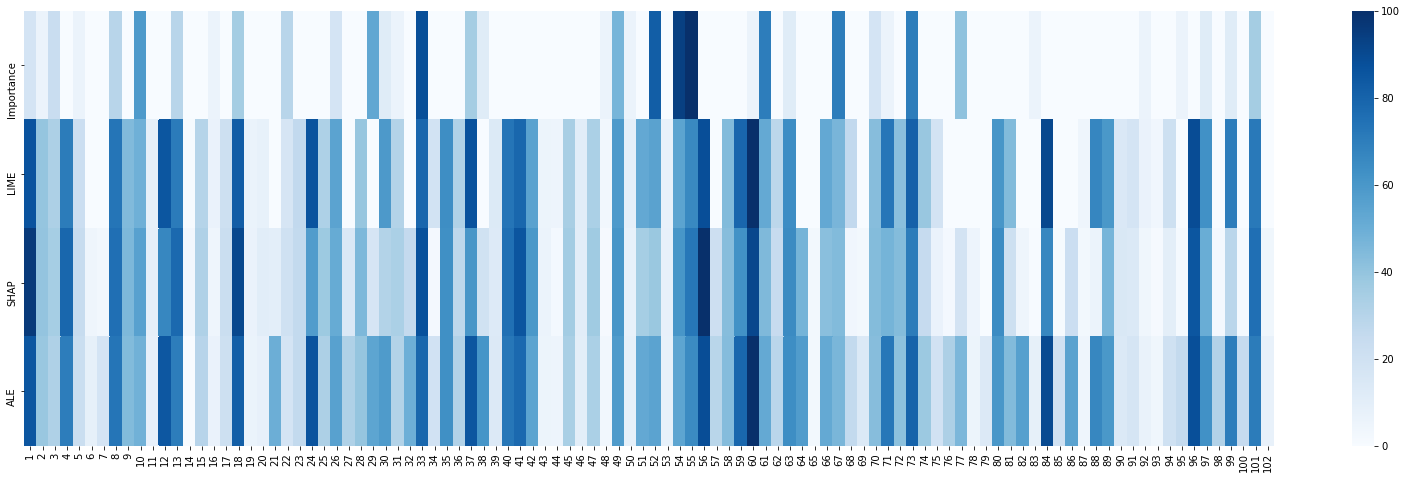

In [172]:
plt.figure(figsize = (28,8))
sns.heatmap(df_general0, cmap="Blues",yticklabels=True, xticklabels=True)

### Clase Depresión Media

In [636]:
max_importance1 = df_importance["Class 1"].max()
max_shap1 = df_shap["Class 1"].max()
max_lime1 = df_lime["Class 1"].max()
max_ale1  = ale_df["Class 1"].max()


In [637]:
df_general1 = pd.DataFrame([  df_importance["Class 1"].multiply(100/max_importance1), 
                            df_lime["Class 1"].multiply(100/max_lime1),  
                            df_shap["Class 1"].multiply(100/max_shap1),
                              
                              ale_df["Class 1"].multiply(100/max_ale1)
                           ])

df_general1.index = ["Importance", "LIME", "SHAP", "ALE"]
df_general1

1          2          3          4          5          6    \
Importance   0.000000  23.529412   0.000000  23.529412   0.000000  23.529412   
LIME        35.481954  31.825713  80.175526  30.961395  23.966404   0.000000   
SHAP        34.684625  28.959277  80.635958  29.802313  23.746972  28.694627   
ALE         34.896942  31.896411  80.377192  30.559069  24.028051  43.573538   

                  7          8             9          10   ...           93   \
Importance   0.000000  29.411765  2.285753e-13  11.764706  ...  2.285753e-13   
LIME         0.000000  22.973585  1.691389e+01  11.579450  ...  3.329315e+01   
SHAP         2.194381  20.290931  1.561357e+01  12.278952  ...  7.654645e+00   
ALE         16.379747  22.148943  1.684757e+01  12.608223  ...  3.325463e+01   

                  94         95         96         97         98         99   \
Importance   5.882353   0.000000   5.882353  47.058824   0.000000   0.000000   
LIME        32.002589   0.000000  23.736907  50.735996   0.000000  32.210975   
SHAP        13.592240   1.138677  18.718643  32.049293   2.968068  11.398098   
ALE         33.085206  21.400418  22.871133  51.566967  46.416204  31.512057   

                  100        101        102  
Importance   5.882353   0.000000   0.000000  
LIME         0.000000  95.275876   0.000000  
SHAP         0.613091  91.145832  17.909026  
ALE         14.680130  95.638951  44.805218  

[4 rows x 102 columns]

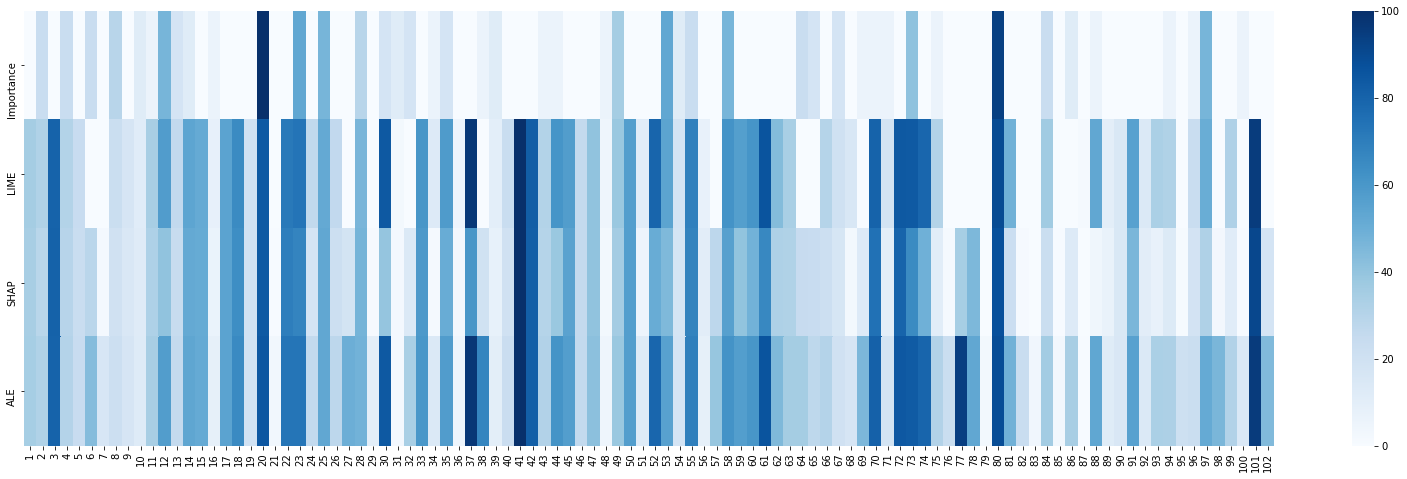

In [638]:
plt.figure(figsize = (28,8))
sns.heatmap(df_general1, cmap="Blues",yticklabels=True, xticklabels=True)

### Clase Depresión Alta

In [173]:
max_importance2 = df_importance["Class 2"].max()
max_shap2 = df_shap["Class 2"].max()
max_lime2 = df_lime["Class 2"].max()
max_ale2  = ale_df["Class 2"].max()


In [174]:
df_general2 = pd.DataFrame([  df_importance["Class 2"].multiply(100/max_importance2), 
                            df_lime["Class 2"].multiply(100/max_lime2),  
                            df_shap["Class 2"].multiply(100/max_shap2),
                              
                              ale_df["Class 2"].multiply(100/max_ale2)
                           ])

df_general2.index = ["Importance", "LIME", "SHAP", "ALE"]
df_general2

1         2          3          4         5          6    \
Importance   4.000000  4.000000   0.000000   0.000000  0.000000   0.000000   
LIME        48.816448  9.123010  38.287632  38.557239  1.158299   0.000000   
SHAP        55.563342  8.826363  43.173282  44.216173  0.766146  32.644119   
ALE         47.983663  8.465188  38.323466  38.038633  0.302390  44.471190   

                  7          8          9          10   ...        93   \
Importance   0.000000   0.000000   0.000000  12.000000  ...   0.000000   
LIME         0.000000  47.851851  26.443363  54.053347  ...  31.307455   
SHAP         6.883577  50.024065  27.294355  62.827090  ...   9.095380   
ALE         29.952344  47.539284  25.975384  54.744850  ...  31.756486   

                  94         95         96          97         98         99   \
Importance   0.000000   4.000000   8.000000  100.000000   0.000000   8.000000   
LIME        46.609038   0.000000  61.639419  100.000000   0.000000  37.141779   
SHAP        23.222804   3.324765  60.830123   76.398016   0.736283  15.090093   
ALE         46.530962  41.241407  60.495255  100.000000  10.623676  37.175348   

                  100        101        102  
Importance   0.000000  12.000000   8.000000  
LIME         0.000000  15.462489   0.000000  
SHAP         0.770798  16.106005  22.068014  
ALE         10.394883  16.230041  44.607341  

[4 rows x 102 columns]

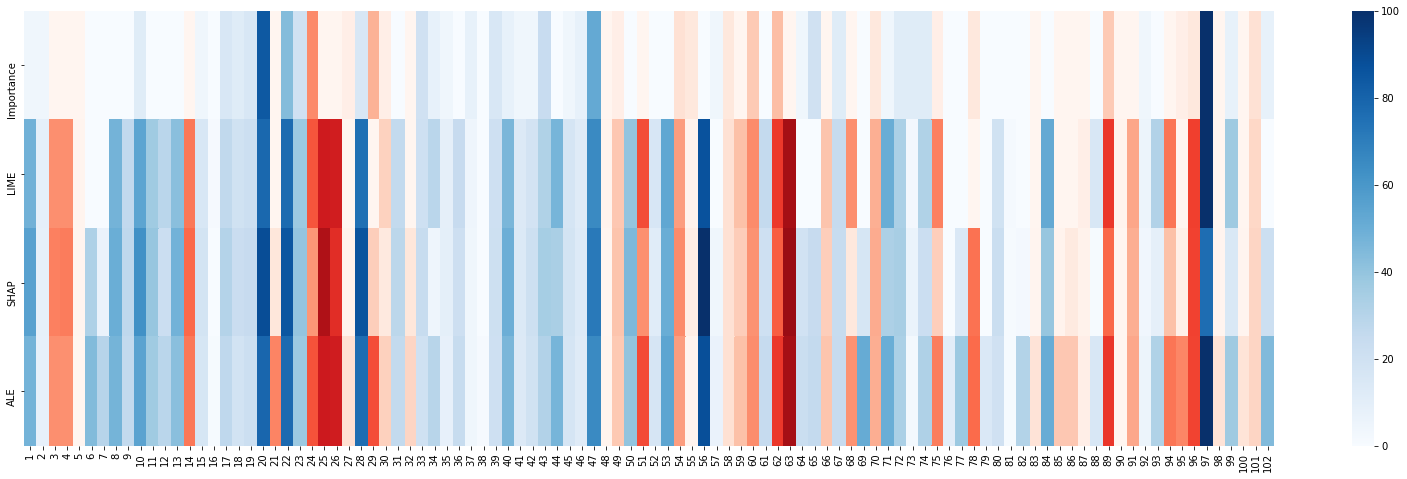

In [177]:
plt.figure(figsize = (28,8))
df_mask_all= pd.concat([df_mask, df_mask,df_mask,df_mask], ignore_index = True, axis = 0)
sns.heatmap(df_general2, cmap="Reds", cbar=False)
sns.heatmap(df_general2, cmap="Blues",yticklabels=True, xticklabels=True, mask=df_mask_all.to_numpy())